# Модель SEIR (Расширенная модель общей эпидемии)

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import math
import xlsxwriter
import pandas as pd

In [2]:
df = pd.read_excel ('/home/kira/Рабочий стол/Golitcino72-17.xls',sheet_name = "G2017" )
interestedRows = df.loc[((df['День'] > 151) & (df['День'] < 245))]
interestedRows = interestedRows.reset_index(drop=True)

In [3]:
def Y1(x):
    return (-32.474 + 0.750*x[0] + 0.412*x[1] + 0.410*x[2] + 0.278*x[3]
            + 0.740*x[4] + 0.309*x[5] - 0.076*x[6] -  0.168*x[7] - 0.065*x[8] + 0.004*x[9]
            + 2.881*x[10] + 1.985*x[11] + 1.988*x[12] + 1.792*x[13] + 0.538*x[14])
def Y2 (x):
    return (-31.342 + 0.639*x[0] + 0.372*x[1] + 0.497*x[2] + 0.220*x[3]
            + 0.655*x[4] + 0.241*x[5] - 0.066*x[6] - 0.150*x[7] - 0.135*x[8] + 0.152*x[9]
            + 4.881*x[10] + 3.553*x[11] + 3.343*x[12] + 2.509*x[13] + 2.297*x[14])

In [25]:
minT = []
maxT = []
falls = []
fives = []
counter = 0
i = 0

def Y1(x):
    return (-32.474 + 0.750*x[0] + 0.412*x[1] + 0.410*x[2] + 0.278*x[3]
            + 0.740*x[4] + 0.309*x[5] - 0.076*x[6] -  0.168*x[7] - 0.065*x[8] + 0.004*x[9]
            + 2.881*x[10] + 1.985*x[11] + 1.988*x[12] + 1.792*x[13] + 0.538*x[14])
def Y2 (x):
    return (-31.342 + 0.639*x[0] + 0.372*x[1] + 0.497*x[2] + 0.220*x[3]
            + 0.655*x[4] + 0.241*x[5] - 0.066*x[6] - 0.150*x[7] - 0.135*x[8] + 0.152*x[9]
            + 4.881*x[10] + 3.553*x[11] + 3.343*x[12] + 2.509*x[13] + 2.297*x[14])

for index, row in interestedRows.iterrows():
    minT.append(df['Мин'].tolist()[i])
    maxT.append(df['Макс'].tolist()[i])
    fall = 0
    if row['Осадки'] > 0.0:
        fall = 1
    falls.append(fall)
    i += 1
    if index > 4:
        minT.pop(0)
        maxT.pop(0)
        falls.pop(0)

    X = maxT + minT + falls

    if len(X) == 15:
        y1 = Y1(X)
        y2 = Y2(X)
        if y1 < y2:
            fives.append(1)
        else:
            fives.append(0)

In [5]:
def r(t):
    SI = 0.75
    IE = 6.79
    ans = 0
    if int(t)>= len(fives):
        ans = 0
    else:    
        five = fives[int(t)]
        ans = SI * IE* five
    return ans

def seir(y, t):
    E, I, R = y
    def Lat(t, S, E, I, R):
        ans = r(t) * S * I - E/LP
        return ans
    S = k * p *np.exp(z*t)/ (k + p*(np.exp(z*t)-1)) - E -I -R
    return [Lat(t, S, E, I, R), E/LP - I/IP, I/IP]

In [6]:
# def integral(x,y):
#     intervals = [(x[i+1]-x[i]) for i in range(len(x)-1)]
#     y = y[1:]
#     sum = 0
#     for i in range(len(intervals)):
#         sum+= intervals[i]*y[i]
#     return sum      

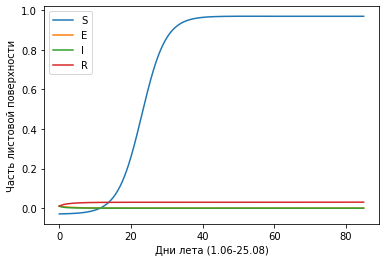

In [29]:
LP = 4 # латентный период
IP = 1 # инфекционный период
I0 = 0.01 # начальная инфекционная часть листовой поверхности
z = 0.3
k = 1.
p = 0.001

t = np.linspace (0, 85, 850)
y0 = [0.01, I0, 0.01]
w = odeint (seir, y0, t)

E = w[:,0]
I = w[:,1]
R = w[:,2]

S = k *p*np.exp(z * t )/ (k + p *(np.exp(z*t) - 1)) - I - E - R

fir = plt.figure()
plt.xlabel('Дни лета (1.06-25.08)')
plt.ylabel('Часть листовой поверхности')
plt.plot(t, S,t, E,t, I,t, R)
plt.legend(['S','E','I','R'])
# fir.savefig('/home/kira/Рабочий стол/Модель 1/11.png', bbox_inches='tight')

LP = 
IP = 
SI = 
IE = 
ALPHA = 
I0 = 

## Года с большими потерями ( 50% - 66% урожая пропало)

Потери: 60.82383115460609 %


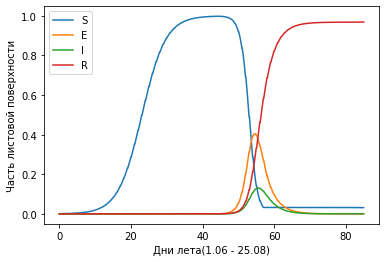

In [24]:
sheets = pd.read_excel ('/home/kira/Рабочий стол/Golitcino72-17.xls', None).keys()
sheets = [item for item in sheets if 'G' in item]

interestedSheets1 = ['G1984','G2016','G2015', 'G2017', 'G2012', 'G2004', 'G2013']
interestedSheets = ['G2013']
for i in interestedSheets:
    df = pd.read_excel ('/home/kira/Рабочий стол/Golitcino72-17.xls',sheet_name = i )
    interestedRows = df.loc[((df['День'] > 151) & (df['День'] < 245))]
    interestedRows = interestedRows.reset_index(drop=True)

    minT = []
    maxT = []
    falls = []
    fives = []
    LP = 2.877
    IP = 1.
    I0 = 0.
    counter = 0
    i = 0

    for index, row in interestedRows.iterrows():
        minT.append(df['Мин'].tolist()[i])
        maxT.append(df['Макс'].tolist()[i])
        fall = 0
        if row['Осадки'] > 0.0:
            fall = 1
        falls.append(fall)
        i += 1
        if index > 4:
            minT.pop(0)
            maxT.pop(0)
            falls.pop(0)
    
        X = maxT + minT + falls

        if len(X) == 15:
            y1 = Y1(X)
            y2 = Y2(X)
            if y1 < y2:
                fives.append(1)
            else:
                fives.append(0)
                
    def r(t):
        IE = 6.9
        SI = 0.85
        ans = 0
        if int(t)>= len(fives):
            ans = 0
        else:    
            five = fives[int(t)]
            ans = SI * IE * five
        return ans

    def seir(y, t):
        E, I, R = y
        def Lat(t, S, E, I, R):
            ans = r(t) * S * I - E/LP
            return ans
        S = k * p *np.exp(z*t)/ (k + p*(np.exp(z*t)-1)) - E -I -R
        return [Lat(t, S, E, I, R), E/LP - I/IP, I/IP]

    newS = np.array([0.00])
    newE = np.array([0])
    newI = np.array([I0])
    newR = np.array([0])
    z = 0.3
    k = 1.
    p = 0.001
    f = 0
    def getFive(ind):
        if int(ind)>= len(fives):
            return 0
        else:    
            return fives[ind]
    
    for i in range(85):
        if 26 < i < 56:
            f += getFive(i)
        y0 = [newE[-1], newI[-1] + getFive(i)/ 7000., newR[-1]]
        t = np.linspace (i, i+1, 10) 

        w = odeint (seir, y0, t,rtol = 1e-900)


        E = w[:,0]
        I = w[:,1]
        R = w[:,2]
        
        S = k * p *np.exp(z*t)/ (k + p*(np.exp(z*t)-1)) - E -I -R
        
        newS = np.concatenate((newS,S))
        newE = np.concatenate((newE,E))
        newI = np.concatenate((newI,I))
        newR = np.concatenate((newR,R))

    f = 0
    t = np.linspace (0, 85, len(newS))

    def proverka():
        for i in range (850):
            temp =  newS[i] + newR[i]+ newE[i] + newI[i]
            if temp >= 1.:
                print(temp)
        return 0
    
    proverka()
    temp = 0
    for j in range (400, 850):
        temp += newR[j] 
    print("Потери:", temp / 450. * 100, "%" )
#     print("Потери:", newR[850] * 100, "%" )
    fir = plt.figure()
    plt.xlabel('Дни лета(1.06 - 25.08)')
    plt.ylabel('Часть листовой поверхности')
    plt.plot(t, newS, t, newE,t, newI,t, newR)
    plt.legend(['S','E','I','R'])
#     fir.savefig('/home/kira/Рабочий стол/Модель 1/1982.png', bbox_inches='tight')

## Года со средними потерями ( 22% - 34% урожая пропало)

Потери: 24.215165934024398 %


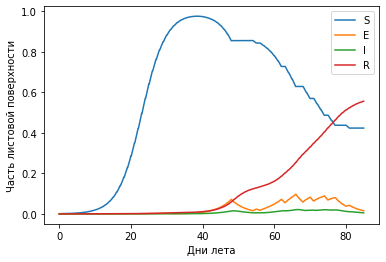

In [634]:
sheets = pd.read_excel ('/home/kira/Рабочий стол/Golitcino72-17.xls', None).keys()
sheets = [item for item in sheets if 'G' in item]

interestedSheets1 = ['G1982','G1987','G1993', 'G1977', 'G1996', 'G1983', 'G2008']
interestedSheets = ['G1987']
for i in interestedSheets:
    df = pd.read_excel ('/home/kira/Рабочий стол/Golitcino72-17.xls',sheet_name = i )
    interestedRows = df.loc[((df['День'] > 151) & (df['День'] < 245))]
    interestedRows = interestedRows.reset_index(drop=True) #обнуляем индексы

    minT = []
    maxT = []
    falls = []
    fives = []
    #зададим параметры (взяты отсюда: https://edepot.wur.nl/206318 страница 74)
    LP = 4.01
    IP = 1.
    I0 = 0.
    counter = 0
    i = 0

    for index, row in interestedRows.iterrows():
        minT.append(df['Мин'].tolist()[i])
        maxT.append(df['Макс'].tolist()[i])
        fall = 0
        if row['Осадки'] > 0.0:
            fall = 1
        falls.append(fall)
        i += 1
        if index > 4:
            minT.pop(0)
            maxT.pop(0)
            falls.pop(0)
    #         соединим все это в один супер массив чтобы положить в функцию
        X = maxT + minT + falls

        if len(X) == 15:
            y1 = Y1(X)
            y2 = Y2(X)
            if y1 < y2:
                fives.append(1)
            else:
                fives.append(0)
                
    def r(t):
        IE = 3.5
        SI = 0.8
        
        ans = 0
        if int(t)>= len(fives):
            ans = 0
        else:    
            five = fives[int(t)]
            ans = SI * IE* five
        return ans

    def seir(y, t):
        E, I, R = y
        def Lat(t, S, E, I, R):
            ans = r(t) * S * I - E/LP
            return ans
        S = k * p *np.exp(z*t)/ (k + p*(np.exp(z*t)-1)) - E -I -R
        return [Lat(t, S, E, I, R), E/LP - I/IP, I/IP]

    def integral(x,y):
        intervals = [(x[i+1]-x[i]) for i in range(len(x)-1)]
        y = y[1:]
        sum = 0
        for i in range(len(intervals)):
            sum+= intervals[i]*y[i]
        return sum

    newS = np.array([0])
    newE = np.array([0])
    newI = np.array([I0])
    newR = np.array([0])
    z = 0.3
    k = 1.
    p = 0.001
    f = 0
    def getFive(ind):
        if int(ind)>= len(fives):
            return 0
        else:    
            return fives[ind]
    
    for i in range(85):
        if 26 < i < 56:
            f += getFive(i)
        y0 = [newE[-1], newI[-1] + getFive(i)/ 10000., newR[-1]]
        t = np.linspace (i, i+1, 10) 

        w = odeint (seir, y0, t,rtol = 1e-900)


        E = w[:,0]
        I = w[:,1]
        R = w[:,2]
        
        S = k * p *np.exp(z*t)/ (k + p*(np.exp(z*t)-1)) - E -I -R
        
        newS = np.concatenate((newS,S))
        newE = np.concatenate((newE,E))
        newI = np.concatenate((newI,I))
        newR = np.concatenate((newR,R))
#     print(f)
    f = 0
    t = np.linspace (0, 85, len(newS))

    def proverka():
        for i in range (850):
            temp =  newS[i] + newR[i]+ newE[i] + newI[i]
            if temp >= 1.:
                print(temp)
        return 0
    proverka()
    temp = 0
    for j in range (400, 850):
        temp += newR[j] 
#     print("Потери 1 :", newR[850] * 100, "%" )
    print("Потери:", temp / 450. * 100, "%" )
    fir = plt.figure()
    plt.xlabel('Дни лета')
    plt.ylabel('Часть листовой поверхности')
    plt.plot(t, newS, t, newE,t, newI,t, newR)
    plt.legend(['S','E','I','R'])
    fir.savefig('/home/kira/Рабочий стол/Модель 1/1987.png', bbox_inches='tight')

## Года с небольшими потерями ( 16% - 18% урожая пропало)

Потери: 17.97648233153813 %


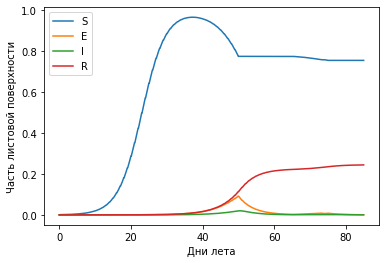

In [448]:
sheets = pd.read_excel ('/home/kira/Рабочий стол/Golitcino72-17.xls', None).keys()
sheets = [item for item in sheets if 'G' in item]

interestedSheets1 = ['G2009','G2014','G1994', 'G1998']
interestedSheets = ['G1998']
for i in interestedSheets:
    df = pd.read_excel ('/home/kira/Рабочий стол/Golitcino72-17.xls',sheet_name = i )
    interestedRows = df.loc[((df['День'] > 151) & (df['День'] < 245))]
    interestedRows = interestedRows.reset_index(drop=True) #обнуляем индексы

    minT = []
    maxT = []
    falls = []
    fives = []
    #зададим параметры (взяты отсюда: https://edepot.wur.nl/206318 страница 74)
    LP = 4.05
    IP = 0.98
    I0 = 0.
    counter = 0
    i = 0

    for index, row in interestedRows.iterrows():
        minT.append(df['Мин'].tolist()[i])
        maxT.append(df['Макс'].tolist()[i])
        fall = 0
        if row['Осадки'] > 0.0:
            fall = 1
        falls.append(fall)
        i += 1
        if index > 4:
            minT.pop(0)
            maxT.pop(0)
            falls.pop(0)
    #         соединим все это в один супер массив чтобы положить в функцию
        X = maxT + minT + falls

        if len(X) == 15:
            y1 = Y1(X)
            y2 = Y2(X)
            if y1 < y2:
                fives.append(1)
            else:
                fives.append(0)
                
    def r(t):
        IE = 3.8
        SI = 0.6
        ans = 0
        if int(t)>= len(fives):
            ans = 0
        else:    
            five = fives[int(t)]
            ans = SI * IE* five
        return ans

    def seir(y, t):
        E, I, R = y
        def Lat(t, S, E, I, R):
            ans = r(t) * S * I - E/LP
            return ans
        S = k * p *np.exp(z*t)/ (k + p*(np.exp(z*t)-1)) - E -I -R
        return [Lat(t, S, E, I, R), E/LP - I/IP, I/IP]

    def integral(x,y):
        intervals = [(x[i+1]-x[i]) for i in range(len(x)-1)]
        y = y[1:]
        sum = 0
        for i in range(len(intervals)):
            sum+= intervals[i]*y[i]
        return sum

    newS = np.array([0])
    newE = np.array([0])
    newI = np.array([I0])
    newR = np.array([0])
    z = 0.3
    k = 1.
    p = 0.001
    f = 0
    def getFive(ind):
        if int(ind)>= len(fives):
            return 0
        else:    
            return fives[ind]
    
    for i in range(85):
        if 26 < i < 56:
            f += getFive(i)
        y0 = [newE[-1], newI[-1] + getFive(i)/ 12000., newR[-1]]
        t = np.linspace (i, i+1, 10) 

        w = odeint (seir, y0, t,rtol = 1e-900)


        E = w[:,0]
        I = w[:,1]
        R = w[:,2]
        
        S = k * p *np.exp(z*t)/ (k + p*(np.exp(z*t)-1)) - E -I -R
        
        newS = np.concatenate((newS,S))
        newE = np.concatenate((newE,E))
        newI = np.concatenate((newI,I))
        newR = np.concatenate((newR,R))
#     print(f)
    f = 0
    t = np.linspace (0, 85, len(newS))

    def proverka():
        for i in range (850):
            temp =  newS[i] + newR[i]+ newE[i] + newI[i]
            if temp >= 1.:
                print(temp)
        return 0
    proverka()
    temp = 0
    for j in range (400, 850):
        temp += newR[j] 
    print("Потери:", temp / 450. * 100, "%" )
    fir = plt.figure()
    plt.xlabel('Дни лета')
    plt.ylabel('Часть листовой поверхности')
    plt.plot(t, newS, t, newE,t, newI,t, newR)
    plt.legend(['S','E','I','R'])
#     fir.savefig('/home/kira/Рабочий стол/Модель 1/1994.png', bbox_inches='tight')

## Года с маленькими потерями ( 7% - 13% урожая пропало)

Потери: 12.992859124262814 %


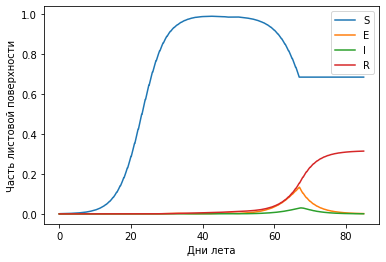

In [524]:
sheets = pd.read_excel ('/home/kira/Рабочий стол/Golitcino72-17.xls', None).keys()
sheets = [item for item in sheets if 'G' in item]
interestedSheets1 = ['G2011','G1991','G2006', 'G1995', 'G2007']
interestedSheets = ['G2007']
for i in interestedSheets:
    df = pd.read_excel ('/home/kira/Рабочий стол/Golitcino72-17.xls',sheet_name = i )
    interestedRows = df.loc[((df['День'] > 151) & (df['День'] < 245))]
    interestedRows = interestedRows.reset_index(drop=True) #обнуляем индексы

    minT = []
    maxT = []
    falls = []
    fives = []
    #зададим параметры (взяты отсюда: https://edepot.wur.nl/206318 страница 74)
    LP = 4.
    IP = 1.
    I0 = 0.
    counter = 0
    i = 0

    for index, row in interestedRows.iterrows():
        minT.append(df['Мин'].tolist()[i])
        maxT.append(df['Макс'].tolist()[i])
        fall = 0
        if row['Осадки'] > 0.0:
            fall = 1
        falls.append(fall)
        i += 1
        if index > 4:
            minT.pop(0)
            maxT.pop(0)
            falls.pop(0)
    #         соединим все это в один супер массив чтобы положить в функцию
        X = maxT + minT + falls

        if len(X) == 15:
            y1 = Y1(X)
            y2 = Y2(X)
            if y1 < y2:
                fives.append(1)
            else:
                fives.append(0)
                
    def r(t):
        IE = 4.343
        SI = 0.59
        ans = 0
        if int(t)>= len(fives):
            ans = 0
        else:    
            five = fives[int(t)]
            ans = SI * IE* five
        return ans

    def seir(y, t):
        E, I, R = y
        def Lat(t, S, E, I, R):
            ans = r(t) * S * I - E/LP
            return ans
        S = k * p *np.exp(z*t)/ (k + p*(np.exp(z*t)-1)) - E -I -R
        return [Lat(t, S, E, I, R), E/LP - I/IP, I/IP]

    def integral(x,y):
        intervals = [(x[i+1]-x[i]) for i in range(len(x)-1)]
        y = y[1:]
        sum = 0
        for i in range(len(intervals)):
            sum+= intervals[i]*y[i]
        return sum

    newS = np.array([0])
    newE = np.array([0])
    newI = np.array([I0])
    newR = np.array([0])
    z = 0.3
    k = 1.
    p = 0.001
    f = 0
    def getFive(ind):
        if int(ind)>= len(fives):
            return 0
        else:    
            return fives[ind]
    
    for i in range(85):
        if 26 < i < 56:
            f += getFive(i)
        y0 = [newE[-1], newI[-1] + getFive(i)/ 10000., newR[-1]]
        t = np.linspace (i, i+1, 10) 

        w = odeint (seir, y0, t,rtol = 1e-900)


        E = w[:,0]
        I = w[:,1]
        R = w[:,2]
        
        S = k * p *np.exp(z*t)/ (k + p*(np.exp(z*t)-1)) - E -I -R
        
        newS = np.concatenate((newS,S))
        newE = np.concatenate((newE,E))
        newI = np.concatenate((newI,I))
        newR = np.concatenate((newR,R))
#     print(f)
    f = 0
    t = np.linspace (0, 85, len(newS))

    def proverka():
        for i in range (850):
            temp =  newS[i] + newR[i]+ newE[i] + newI[i]
            if temp >= 1.:
                print(temp)
        return 0
    proverka()
    temp = 0
    for j in range (400, 850):
        temp += newR[j] 
    print("Потери:", temp / 450. * 100, "%" )
    fir = plt.figure()
    plt.xlabel('Дни лета')
    plt.ylabel('Часть листовой поверхности')
    plt.plot(t, newS, t, newE,t, newI,t, newR)
    plt.legend(['S','E','I','R'])
    fir.savefig('/home/kira/Рабочий стол/Модель 1/2007.png', bbox_inches='tight')

## Года с незначительными потерями ( 1% - 5% урожая пропало)

Потери: 2.836607188756535 %


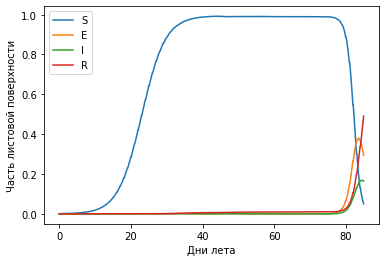

In [630]:
sheets = pd.read_excel ('/home/kira/Рабочий стол/Golitcino72-17.xls', None).keys()
sheets = [item for item in sheets if 'G' in item]

interestedSheets1 = ['G1972','G1997','G2010', 'G2005', 'G2002', 'G1973', 'G1992']
interestedSheets = ['G1992']
for i in interestedSheets:
    df = pd.read_excel ('/home/kira/Рабочий стол/Golitcino72-17.xls',sheet_name = i )
    interestedRows = df.loc[((df['День'] > 151) & (df['День'] < 245))]
    interestedRows = interestedRows.reset_index(drop=True) #обнуляем индексы

    minT = []
    maxT = []
    falls = []
    fives = []
    #зададим параметры (взяты отсюда: https://edepot.wur.nl/206318 страница 74)
    LP = 2.2
    IP = 1.1
    I0 = 0.
    counter = 0
    i = 0

    for index, row in interestedRows.iterrows():
        minT.append(df['Мин'].tolist()[i])
        maxT.append(df['Макс'].tolist()[i])
        fall = 0
        if row['Осадки'] > 0.0:
            fall = 1
        falls.append(fall)
        i += 1
        if index > 4:
            minT.pop(0)
            maxT.pop(0)
            falls.pop(0)
    #         соединим все это в один супер массив чтобы положить в функцию
        X = maxT + minT + falls

        if len(X) == 15:
            y1 = Y1(X)
            y2 = Y2(X)
            if y1 < y2:
                fives.append(1)
            else:
                fives.append(0)
                
    def r(t):
        IE = 6.25
        SI = 0.9
        ans = 0
        if int(t)>= len(fives):
            ans = 0
        else:    
            five = fives[int(t)]
            ans = SI * IE* five
        return ans

    def seir(y, t):
        E, I, R = y
        def Lat(t, S, E, I, R):
            ans = r(t) * S * I - E/LP
            return ans
        S = k * p *np.exp(z*t)/ (k + p*(np.exp(z*t)-1)) - E -I -R
        return [Lat(t, S, E, I, R), E/LP - I/IP, I/IP]

    def integral(x,y):
        intervals = [(x[i+1]-x[i]) for i in range(len(x)-1)]
        y = y[1:]
        sum = 0
        for i in range(len(intervals)):
            sum+= intervals[i]*y[i]
        return sum

    newS = np.array([0])
    newE = np.array([0])
    newI = np.array([I0])
    newR = np.array([0])
    z = 0.3
    k = 1.
    p = 0.001
    f = 0
    def getFive(ind):
        if int(ind)>= len(fives):
            return 0
        else:    
            return fives[ind]
    
    for i in range(85):
        if 26 < i < 56:
            f += getFive(i)
        y0 = [newE[-1], newI[-1] + getFive(i)/ 8000., newR[-1]]
        t = np.linspace (i, i+1, 10) 

        w = odeint (seir, y0, t,rtol = 1e-900)


        E = w[:,0]
        I = w[:,1]
        R = w[:,2]
        
        S = k * p *np.exp(z*t)/ (k + p*(np.exp(z*t)-1)) - E -I -R
        
        newS = np.concatenate((newS,S))
        newE = np.concatenate((newE,E))
        newI = np.concatenate((newI,I))
        newR = np.concatenate((newR,R))
#     print(f)
    f = 0
    t = np.linspace (0, 85, len(newS))

    def proverka():
        for i in range (850):
            temp =  newS[i] + newR[i]+ newE[i] + newI[i]
            if temp >= 1.:
                print(temp)
        return 0
    proverka()

    temp = 0
    for j in range (400, 850):
        temp += newR[j] 
    print("Потери:", temp / 450. * 100, "%" )
    fir = plt.figure()
    plt.xlabel('Дни лета')
    plt.ylabel('Часть листовой поверхности')
    plt.plot(t, newS, t, newE,t, newI,t, newR)
    plt.legend(['S','E','I','R'])
#     fir.savefig('/home/kira/Рабочий стол/Модель 1/1973.png', bbox_inches='tight')

In [13]:
# diseaseTime = 0
# diseaseTemp = 0
# A = 0

# df = pd.read_excel ('/home/kira/Рабочий стол/Golitcino72-17.xls',sheet_name = "G2013" )
# interestedRows = df.loc[((df['День'] > 151) & (df['День'] < 245))]
# interestedRows = interestedRows.reset_index(drop=True) #обнуляем индексы
# def Y1(x):
#     return (-32.474 + 0.750*x[0] + 0.412*x[1] + 0.410*x[2] + 0.278*x[3]
#             + 0.740*x[4] + 0.309*x[5] - 0.076*x[6] -  0.168*x[7] - 0.065*x[8] + 0.004*x[9]
#             + 2.881*x[10] + 1.985*x[11] + 1.988*x[12] + 1.792*x[13] + 0.538*x[14])
# def Y2 (x):
#     return (-31.342 + 0.639*x[0] + 0.372*x[1] + 0.497*x[2] + 0.220*x[3]
#             + 0.655*x[4] + 0.241*x[5] - 0.066*x[6] - 0.150*x[7] - 0.135*x[8] + 0.152*x[9]
#             + 4.881*x[10] + 3.553*x[11] + 3.343*x[12] + 2.509*x[13] + 2.297*x[14])

# minT = []
# maxT = []
# falls = []
# counter = 0
# i = 0
# fives = []
# for index, row in interestedRows.iterrows():
#     minT.append(df['Мин'].tolist()[i])
#     maxT.append(df['Макс'].tolist()[i])
#     fall = 0
#     if row['Осадки'] > 0.0:
#         fall = 1
#     falls.append(fall)
#     i += 1
#     if index > 4:
#         minT.pop(0)
#         maxT.pop(0)
#         falls.pop(0)
        
# #         соединим все это в один супер массив чтобы положить в функцию
#     X = maxT + minT + falls
    
#     if len(X) == 15:
#         y1 = Y1(X)
#         y2 = Y2(X)
#         if y1 < y2:
#             diseaseTime = i - 5
#             diseaseTemp = maxT[0] / 2. + minT[0] / 2.
#             A = (maxT[0] - minT[0])
#             counter+=1
#             break 
# print(A)
# E0 = {
#             A < 0: float('nan'),   
#             0 <= A < 5: {
#                            diseaseTemp < 10: 0.0078,
#                     10 <= diseaseTemp < 12:   0.0312,
#                       12 <= diseaseTemp < 15:  0.034,
#                 15 <= diseaseTemp < 17:   0.0215,
#                 17 <= diseaseTemp < 20:   0.0122,
#                 20 <= diseaseTemp < 23:   0.0280,
#                 23 <= diseaseTemp < 27:   0.0195,
                
#                      27 <= diseaseTemp: float('nan')
#             }[True],
    
#         5 <= A < 10: {
#                            diseaseTemp < 10: 0.0025,
#                     10 <= diseaseTemp < 12:   0.056,
#                       12 <= diseaseTemp < 15:  0.028,
#                 15 <= diseaseTemp < 17:   0.019,
#                 17 <= diseaseTemp < 20:   0.0055,
#                 20 <= diseaseTemp < 23:   0.006,
#                 23 <= diseaseTemp < 27:   0.0036,
                
#                      27 <= diseaseTemp: float('nan')
#             }[True],
#           10 <= A :{
#                            diseaseTemp < 10: 0.0088,
#                     10 <= diseaseTemp < 12:   0.0122,
#                       12 <= diseaseTemp < 15:  0.0101,
#                 15 <= diseaseTemp < 17:   0.0158,
#                 17 <= diseaseTemp < 20:   0.030,
#                 20 <= diseaseTemp < 23:   0.037,
#                 23 <= diseaseTemp < 27:   0.016,
                
#                      27 <= diseaseTemp: float('nan')
#             }[True]
#     }[True]
# minT = []
# maxT = []
# falls = []
# counter = 0
# i = 0
# fives = []
# for index, row in interestedRows.iterrows():
#     minT.append(df['Мин'].tolist()[i])
#     maxT.append(df['Макс'].tolist()[i])
#     fall = 0
#     if row['Осадки'] > 0.0:
#         fall = 1
#     falls.append(fall)
#     i += 1
#     #print(weatherrow['Min t'].tolist()[0])
#     if index > 4:
#         minT.pop(0)
#         maxT.pop(0)
#         falls.pop(0)
        
# #         соединим все это в один супер массив чтобы положить в функцию
#     X = maxT + minT + falls
    
# #     print(X)
#     if len(X) == 15:
#         y1 = Y1(X)
#         y2 = Y2(X)
# #         print(y1, y2)
#         if y1 < y2:
#             fives.append(1)
#         else:
#             fives.append(0)
# # print(E0)
# # print(diseaseTime/1.0)
# # diseaseTemp
# # print(len(fives))

In [14]:
# diseaseTime = 0
# diseaseTemp = 0
# A = 0

# df = pd.read_excel ('/home/kira/Рабочий стол/Golitcino72-17.xls',sheet_name = "G2004" )
# interestedRows = df.loc[((df['День'] > 151) & (df['День'] < 245))]
# interestedRows = interestedRows.reset_index(drop=True) #обнуляем индексы
# def Y1(x):
#     return (-32.474 + 0.750*x[0] + 0.412*x[1] + 0.410*x[2] + 0.278*x[3]
#             + 0.740*x[4] + 0.309*x[5] - 0.076*x[6] -  0.168*x[7] - 0.065*x[8] + 0.004*x[9]
#             + 2.881*x[10] + 1.985*x[11] + 1.988*x[12] + 1.792*x[13] + 0.538*x[14])
# def Y2 (x):
#     return (-31.342 + 0.639*x[0] + 0.372*x[1] + 0.497*x[2] + 0.220*x[3]
#             + 0.655*x[4] + 0.241*x[5] - 0.066*x[6] - 0.150*x[7] - 0.135*x[8] + 0.152*x[9]
#             + 4.881*x[10] + 3.553*x[11] + 3.343*x[12] + 2.509*x[13] + 2.297*x[14])


# minT = []
# maxT = []
# falls = []
# counter = 0
# i = 0
# fives = []
# for index, row in interestedRows.iterrows():
#     minT.append(df['Мин'].tolist()[i])
#     maxT.append(df['Макс'].tolist()[i])
#     fall = 0
#     if row['Осадки'] > 0.0:
#         fall = 1
#     falls.append(fall)
#     i += 1
#     if index > 4:
#         minT.pop(0)
#         maxT.pop(0)
#         falls.pop(0)
        
# #         соединим все это в один супер массив чтобы положить в функцию
#     X = maxT + minT + falls

#     if len(X) == 15:
#         y1 = Y1(X)
#         y2 = Y2(X)
#         if y1 < y2:
#             fives.append(1)
#         else:
#             fives.append(0)
            
# def r(t):
#     SI = 0.75
#     IE = 6.79
#     ans = 0
#     if int(t)>= len(fives):
#         ans = 0
#     else:    
#         five = fives[int(t)]
#         ans = SI * IE* five
# #         print(ans)
#     return ans
# def seir(y, t):
#     E, I, R = y
#     def Lat(t, S, E, I, R):
# #         print(t)
# #         ans = r(t) * S * I - E/LP
#         ans = r(t) * S * I - E/LP
#         return ans
    
#     S = ((80*math.pi)**(-1/2))*(np.exp((-(t-45)**2)/(80)))-I - E - R
#     return [ Lat(t, S, E,I,R), E/LP - I/IP, I/IP]
# #зададим параметры (взяты отсюда: https://edepot.wur.nl/206318 страница 74)
# #в статье используется обозначение k, у меня это r
# LP = 4
# IP = 1
# I0 = 0
# def integral(x,y):
#     intervals = [(x[i+1]-x[i]) for i in range(len(x)-1)]
#     y = y[1:]
#     sum = 0
#     for i in range(len(intervals)):
#         sum+= intervals[i]*y[i]
#     return sum

# newS = np.array([0])
# newE = np.array([0])
# newI = np.array([I0])
# newR = np.array([0])

# def getFive(ind):
#     if int(ind)>= len(fives):
#         return 0
#     else:    
#         return fives[ind] / 1000.
# for i in range(90):
#     if 26 < i < 56:
#         y0 = [newE[-1],newI[-1]+getFive(i),newR[-1]]
#     else:
#         y0 = [newE[-1],newI[-1],newR[-1]]
#     t = np.linspace (i, i+1, 10) 
    
#     w = odeint (seir, y0, t,rtol = 1e-900)
#     E = w[:,0]
#     I = w[:,1]
#     R = w[:,2]
#     S = ((80*math.pi)**(-1/2))*(np.exp((-(t-45)**2)/(80))) - I - E - R
    
#     newS = np.concatenate((newS,S))
#     newE = np.concatenate((newE,E))
#     newI = np.concatenate((newI,I))
#     newR = np.concatenate((newR,R))

# t = np.linspace (0, 90, len(newS))
# AUDPCS = integral(t,newS)
# AUDPCE = integral(t,newE)
# AUDPCI = integral(t,newI)
# AUDPCR = integral(t,newR)
# # W = AUDPC / 52 *100

# # print(AUDPCS - AUDPCR)
# # print(W)
# fir = plt.figure()
# plt.xlabel('Дни лета')
# plt.plot(t, newS, t, newE,t, newI,t, newR)
# plt.legend(['S','E','I','R'])